# **STROJNO UČENJE** 22./23.
# Vježba 08 - smanjenje dimenzionalnosti i odabir značajki

**Smanjenje dimenzionalnosti** (eng. [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction)) je tehnika transformacije podataka u kojoj se na smislen način smanjuje broj značajki. Drugim riječima, funkcijom se podatke iz jednog prostora dimenzije $D$ preslikava u drugi prostor manje dimenzije $d < D$.

<img src='https://drive.google.com/uc?id=1l38x9SLonVjRPtMLkWO8vxuttPziJoA2' width='600'>

<img src='https://drive.google.com/uc?id=1MATaGjN1uY20Tpq8tAa5ngSS5D0VT2fM'>


2 načina:
- **odabir značajki** (eng. [feature selection](https://en.wikipedia.org/wiki/Feature_selection)) - ne mijenjamo originalne značajke (projekcija u potprostor)
- **manipulacija značajkama** (eng. [feature extraction](https://en.wikipedia.org/wiki/Feature_extraction)) - prebačaj u drugi prostor značajki (mapiranje u novi prostor)

## Klasifikacija

Radimo binarnu klasifikaciju nad podacima o raku dojke gdje klase $\{0, 1\}$ predstavljaju sadrži li tkivo degenerirane stanice.

In [ ]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer() # ovaj objekt je tipa 'sklearn.utils.Bunch' (struktura rjecnika)
X, y = bc.data, bc.target

In [ ]:
type(bc)

sklearn.utils.Bunch

In [ ]:
X.shape

(569, 30)

In [ ]:
# bc.DESCR.split('\n')
# X
# y

In [ ]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Odabir značajki

Imamo puno značajki (njih 30) što znači da djelujemo u 30-dimenzionalnom prostoru, odnosno da su naši podaci 30-dimenzionalni vektori. Kako bismo smanjili broj značajki s kojima radimo, promotrimo koje značajke je uputno odabrati.

Općenito je dobra praksa uzeti "najvažnije" značajke, odnosno one koje su najviše "povezane" s varijablom koju predviđamo. Pogledajmo matricu korelacije.

In [ ]:
import pandas as pd

data = pd.concat([pd.DataFrame(y), pd.DataFrame(X)], axis=1).copy()
data.columns = ['class'] + ['feature_' + str(i) for i in range(X.shape[1])]
data

,class,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


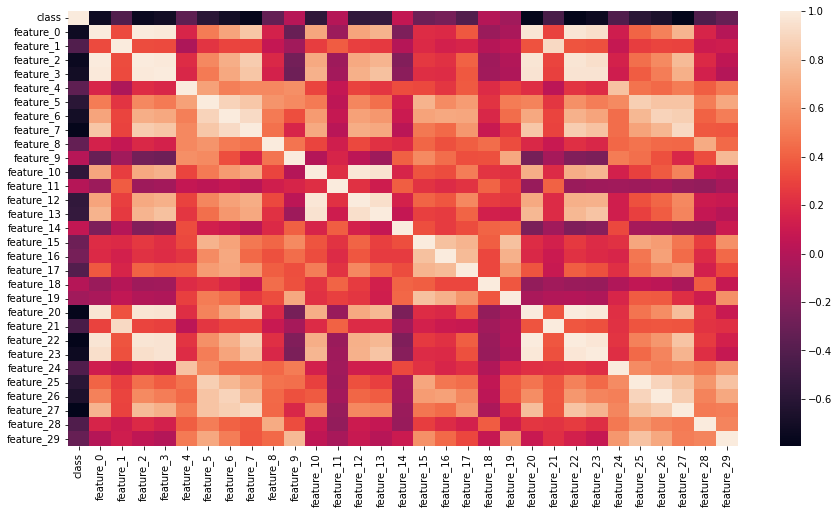

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 15,8
sns.heatmap(data.corr())

Vidimo da su neke značajke međusobno visoko korelirane. Ono što nas najviše zanima je korelacija značajki sa zavisnom varijablom *class*. Vidimo da su sve značajke relativno visoko (negativno) korelirane s njom, s nekoliko iznimki. To znači da vjerojatno nećemo pogriješiti puno pri izboru najvažnijih značajki, ali svejedno moramo postupiti metodično i informirano kako bismo maksimizirali točnost modela u klasifikaciji a pritome reducirali kompleksnost modela.

> Ponekad je važno raspoznati postoji li u podacima fenomen tzv. [multikolinearnosti](https://towardsdatascience.com/multicollinearity-problem-or-not-d4bd7a9cfb91) (koreliranosti značajki među sobom) jer to može utjecati na modele, ovisno o problemu koji se rješava.

Kako bismo odabrali $k \in \mathbb{N}$ najboljih značajki, koristit ćemo [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) iz *sklearn* biblioteke. Dakle, dimenzija novog prostora gdje će naši podaci "živjeti" je unaprijed određeni broj $k$.

Pri definiciji objekta koji će vratiti $k$ najboljih značajki potrebno je naglasiti po kojem kriteriju uspoređujemo pogodnost značajki, odnosno kako odlučujemo koje su značajke "dobre". To ovisi o zadatku kojeg rješavamo (u našem slučaju klasifikacija sa zavisnom varijablom *class*). Mi koristimo *hi kvadrat* vrijednost iz statističkog testa, što je i preporučeno u *sklearn* [vodiču](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection).

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_, y_ = data[['feature_' + str(i) for i in range(X.shape[1])]], data['class']

k = 10
selector = SelectKBest(chi2, k=k) # naglasavamo da zelimo 10 najznacajnijih znacajki
X_new = selector.fit_transform(X_, y_)

In [ ]:
X_new.shape

(569, 10)

In [ ]:
print('Izabrane su ove značajke:\n\n', selector.get_feature_names_out(['feature_' + str(i) for i in range(X.shape[1])]))

Izabrane su ove značajke:

 ['feature_0' 'feature_1' 'feature_2' 'feature_3' 'feature_12' 'feature_13'
 'feature_20' 'feature_21' 'feature_22' 'feature_23']


Pogledajmo rezultate klasifikacije s originalnim brojem značajki (30) i smanjenim brojem značajki.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_, y_)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_)

clf_30 = RandomForestClassifier(random_state=42)
clf_new = RandomForestClassifier(random_state=42)

clf_30.fit(X_train, y_train)
clf_new.fit(X_train_new, y_train_new)

print(f'Točnost s 30 značajki = {accuracy_score(clf_30.predict(X_test), y_test)}')
print(f'Točnost s {k} značajki = {accuracy_score(clf_new.predict(X_test_new), y_test_new)}')

Točnost s 30 značajki = 0.9790209790209791
Točnost s 10 značajki = 0.9300699300699301


Vidimo da se točnost smanjila, što je i očekivano jer smo ukinuli dio podataka modelu. Model tijekom treniranja ima na raspolaganju manje podataka jer podaci imaju manje značajki. Dakle, nije uvijek dobro samo "otkinuti" dio podataka kako bismo smanjili njihovu dimenzionalnost. Postoji "pametniji" način - transformiranje *svih* originalnih značajki u nove, čime zadržavamo više dostupnih informacija.

Važnost značajki (eng. [feature importance](https://medium.com/swlh/feature-importance-hows-and-why-s-3678ede1e58f)) je samo po sebi zadatak koji može biti prilično kompleksan, a kojim pokušavamo algoritmom odrediti važnost svake značajke u danom kontekstu (zadatku kojeg rješavamo).

Jedan od algoritama koji se često koristi za otkrivanje bitnosti značajki je [slučajna šuma](https://towardsdatascience.com/random-forest-for-feature-importance-ea90852b8fc5). Pogledajmo efekt na problemu regresije (nije bitno kojeg je tipa problem koji rješavamo - odabir i manipulacija značajki spadaju u tehnike poboljšanja modela, nisu sami modeli kojim rješavamo zadani zadatak).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

california = fetch_california_housing()
X_regr = pd.DataFrame(california.data, columns=california.feature_names)
y_regr = california.target

X_regr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, y_regr)

rf = RandomForestRegressor()
rf.fit(X_train_regr, y_train_regr)

rf.feature_importances_

array([0.52835943, 0.05262088, 0.04633923, 0.02989975, 0.03217184,
       0.13493209, 0.08809235, 0.08758442])

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

<BarContainer object of 8 artists>

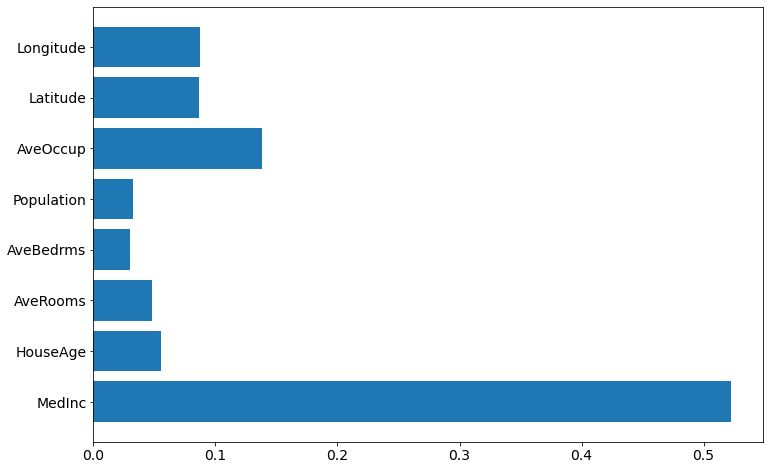

In [ ]:
plt.barh(california.feature_names, rf.feature_importances_)

### Manipulacija značajkama

Kako vizualizirati visoko dimenzionalne podatke? Tako što ih smjestimo preslikavanjem (algoritmom) u prostor manje dimenzije koji možemo vizualizirati. U svrhu vizualizacije i u svrhu manipulacije značajkama koristimo algoritme smanjenja dimenzionalnosti.

Algoritmi koje ćemo pogledati:

- [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) - jedan od najpoznatijih algoritama koji se koirsti za smanjenje dimenzionalnosti
- [t-SNE](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) - noviji (2009) algoritam korišten uglavnom za vizualizacijske svrhe rezultata konvolucijskih neuronskih mreža

#### PCA - Principal Component Analysis (analiza glavnih komponenti)

PCA je algoritam koji podatke preslikava u novi prostor na način da mijenja osi prostora na one kojima se najviše varijance u podacima može objasniti.

Dobro je znati:

- značajke (stupci u DataFrameu) su osi prostora gdje "žive" uzorci (retci DataFramea)
- PCA nalazi nove osi tako da one budu *okomite* - nove značajke su **nekorelirane**
- nove značajke ne moraju nužno biti bolji odabir za rješavanje danog problema (npr. klasifikacije)!

In [ ]:
abalone = pd.read_csv('/content/drive/MyDrive/strojno_ucenje_2223/vj_08/abalone.csv')

abalone.shape

(4177, 9)

Radimo s numeričkim podacima o morskim puževima. Podaci su već skalirani - to je važno kad radimo s projekcijama u druge prostore, pogotovo PCA, jer ne želimo da neke značajke dominiraju u izračunu (i fiktivno budu postavljene kao najbitnije) samo zato što su veći brojevi.

In [ ]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
from sklearn.decomposition import PCA

abalone_numerical = abalone.drop(['Sex', 'Rings'], axis=1).copy()

pca = PCA(n_components=2) # naglasavamo novu, manju dimenziju parametrom broja komponenti
abalone_pca_2 = pca.fit_transform(abalone_numerical)

pca = PCA(n_components=3)
abalone_pca_3 = pca.fit_transform(abalone_numerical)

abalone_pca_2.shape

(4177, 2)

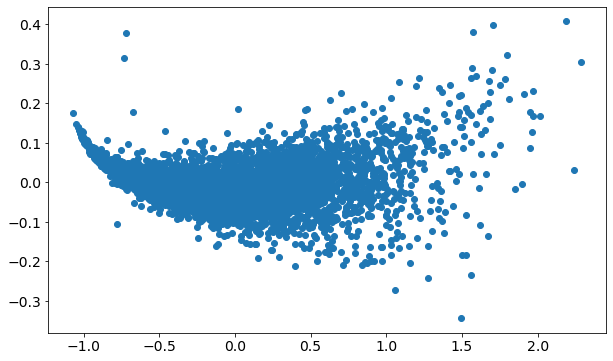

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

plt.scatter(abalone_pca_2[:, 0], abalone_pca_2[:, 1])

In [ ]:
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(abalone_pca_3[:, 0], abalone_pca_3[:, 1], abalone_pca_3[:, 2])
# plt.show()

In [ ]:
import plotly.express as px

abalone_df = pd.DataFrame({'feature_1':abalone_pca_3[:, 0], 'feature_2':abalone_pca_3[:, 1], 'feature_3':abalone_pca_3[:, 2]})

fig = px.scatter_3d(abalone_df, x='feature_1', y='feature_2', z='feature_3')
fig.show()

#### T-SNE projekcije (Stochastic Neighbour Embeddings)

[t-SNE](https://www.tivadardanka.com/blog/how-tsne-works) uglavnom koristimo za prikazivanje podataka na grafu. U [sklearn dokumentaciji](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) možemo pronaći osnovni opis ovog algoritma.

> Pripazimo! Ovaj algoritam je računalno skup za izvođenje (eng. computationally expensive) = spor i/ili memorijski zahtjevan.

In [ ]:
from sklearn.manifold import TSNE

# Projiciramo 7-dimenzionalne podatke u 2-dimenzionalni prostor
tsne = TSNE(n_components=2, init='random', random_state=0)
abalone_proj = tsne.fit_transform(abalone_numerical)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


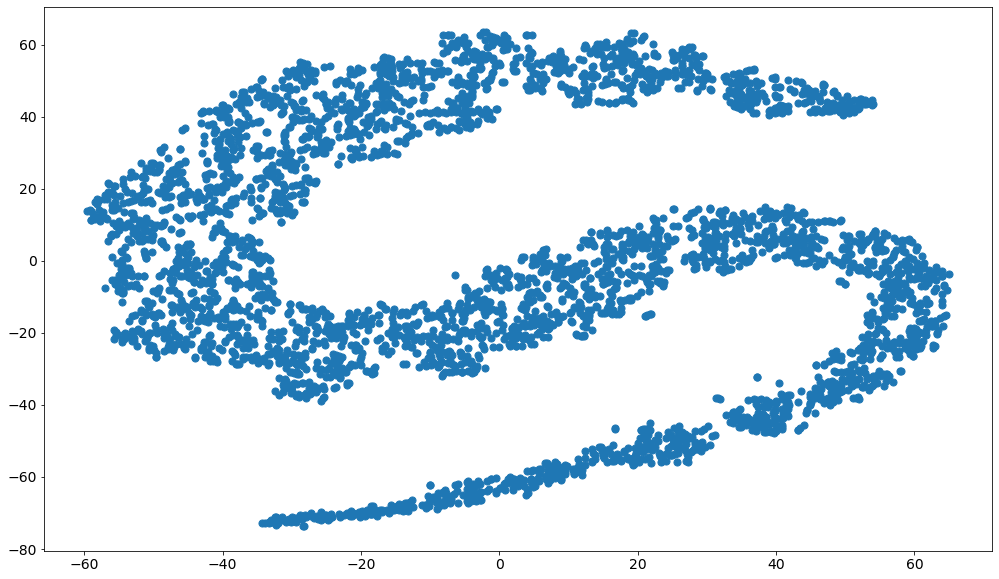

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
scatter = ax.scatter(abalone_proj[:,0], abalone_proj[:,1], s=50, cmap='tab20')
plt.show()

Vidimo da upotrebom različitih algoritama za smanjenje dimenzionalnosti dobivamo drugačije rezultate! Iz tog razloga treba uvijek biti oprezan pri manipulaciji značajkama kako ne bismo nehotice postigli neželjene efekte.